# How to get into Graduation school - Prediction analysis

In [1]:
"""
References:
S ACHARYA, M., 2023. Graduate Admission 2. kaggle Linear Regression, [Online]. 1, 1. Available at: https://www.kaggle.com/datasets/mohansacharya/graduate-admissions?datasetId=14872&sortBy=voteCount [Accessed 20 March 2023].
Kaggle_member, N., 2023. How to get into graduate school?. Graduate Admission 2, [Online]. 4, 1. Available at: https://www.kaggle.com/code/nilanml/how-to-get-into-graduate-school/notebook [Accessed 20 March 2023].
DATTA, N., 2021. Graduate Admission Chances. Graduate Admission Chances - Graduate Admission 2, [Online]. 12, 1. Available at: https://www.kaggle.com/code/nitindatta/graduate-admission-chances [Accessed 21 April 2023].
Singh, S., 2023. Hypothesis Testing+EDA+Model Creation=Insights. Hypothesis Testing+EDA+Model Creation=Insights - Graduate Admission 2, [Online]. 11, 1. Available at: https://www.kaggle.com/code/sonalisingh1411/hypothesis-testing-eda-model-creation-insights [Accessed 21 April 2023].
KRALMACHINE, K., 2019. Analyzing the Graduate Admission EDA & ML. Analyzing the Graduate Admission EDA & ML - Graduate Admission 2, [Online]. 36, 1. Available at: https://www.kaggle.com/code/kralmachine/analyzing-the-graduate-admission-eda-ml [Accessed 21 April 2023].
PUTCHALA, S., 2020. Chances of getting into my Dream University. Chances of getting into my Dream University - Graduate Admission 2, [Online]. 1, 1. Available at: https://www.kaggle.com/code/sreshta140/chances-of-getting-into-my-dream-university [Accessed 21 April 2023].
KUMAR, V., 2023. Admission Predictrion + EDA. Admission Predictrion + EDA - Graduate Admission 2, [Online]. 6, 1. Available at: https://www.kaggle.com/code/vipin20/admission-predictrion-eda [Accessed 21 April 2023].
AHMED, Z., 2021. Graduate Admission Prediction LinearRegression. Graduate Admission Prediction LinearRegression - Graduate Admission 2, [Online]. 4, 1. Available at: https://www.kaggle.com/code/zohaib123/graduate-admission-prediction-linearregression [Accessed 21 April 2023].
SREEDHAR, S., 2020. Prediction of You Getting an Admit in US. Prediction of You Getting an Admit in US - Graduate Admission 2, [Online]. 11, 1. Available at: https://www.kaggle.com/code/sujay12345/prediction-of-you-getting-an-admit-in-us [Accessed 21 April 2023].
RANDIVE, Y., 2020. GraduateAdmissionPrediction. GraduateAdmissionPrediction - Graduate Admission 2, [Online]. 2, 1. Available at: https://www.kaggle.com/code/yashrandive11/graduateadmissionprediction [Accessed 21 April 2023].
"""


#Importing packages
import numpy as np#performs a wide variety of mathematical operations
import pandas as pd#manipulation of tabular data in DataFrames
import matplotlib.pyplot as plt#creates a figure, creates a plotting area in a figure
import seaborn as sns#statistical graphics
import plotly.express as px#data visualization library to create interactive and publication-quality charts and graphs

import pickle#Saving model

#Making preditions using machine learning algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline#display matplotlib plots inline
import warnings
warnings.filterwarnings('ignore')

**Loading data set**

In [2]:
"""
Reading the data from a csv file and converting it into a dataframe.
Reading the first five rows of the dataframe.
"""
graduateAdmissions = pd.read_csv('./Admission_Predict.csv')
graduateAdmissions.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
#Reading the amount of columns(9) and rows(400) there are in the dataframe
graduateAdmissions.shape

(400, 9)

In [4]:
#Checking the columns they are using
graduateAdmissions.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
"""
Get more information about the dataframe, 
checking column types, 
checking to see if there are any null values.
"""
graduateAdmissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
# Some basic statistical analysis about the data
graduateAdmissions.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


**Data cleaning**

In [7]:
#sums all the null values in each column
graduateAdmissions.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
"""
Drops these columns from the dataframe, unnessary columns from data removed.
"""
graduateAdmissions = graduateAdmissions.drop(['Serial No.'],axis=1)

graduateAdmissions.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
"""
Getting rid of whitespaces in the column names
"""
graduateAdmissions.columns = graduateAdmissions.columns.str.replace(' ', '')
graduateAdmissions.columns

Index(['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR', 'CGPA',
       'Research', 'ChanceofAdmit'],
      dtype='object')

**Analysis**

<AxesSubplot:>

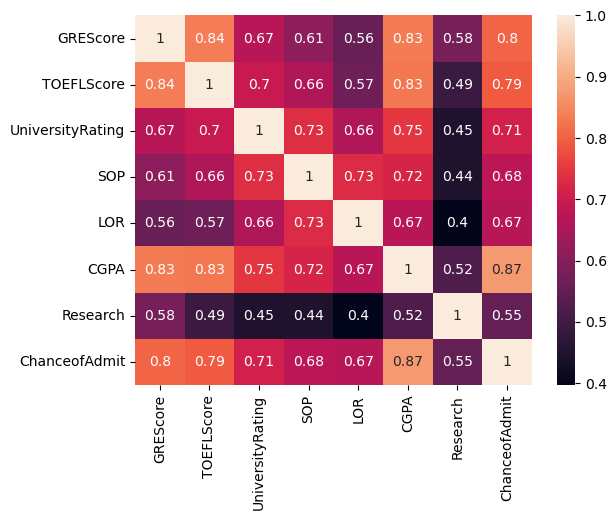

In [10]:
"""
Here we are generating a correlation matrix to see which columns are highly correlated with each other.
As can be seen by the independant variables GREScore, TOEFLScore and CGPA, they are very highly correlated with the dependant variable ChanceofAdmit.
This is good as it means that we can use these variables to predict the ChanceofAdmit.
"""
graduateAdmissions.corr()
sns.heatmap(graduateAdmissions.corr(),annot=True)

In [11]:
"""
Checking the values that have a chance of Admit higher than 75%
"""
query1 = graduateAdmissions[graduateAdmissions['ChanceofAdmit']>0.75]
query1

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
3,322,110,3,3.5,2.5,8.67,1,0.80
5,330,115,5,4.5,3.0,9.34,1,0.90
11,327,111,4,4.0,4.5,9.00,1,0.84
...,...,...,...,...,...,...,...,...
394,329,111,4,4.5,4.0,9.23,1,0.89
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91


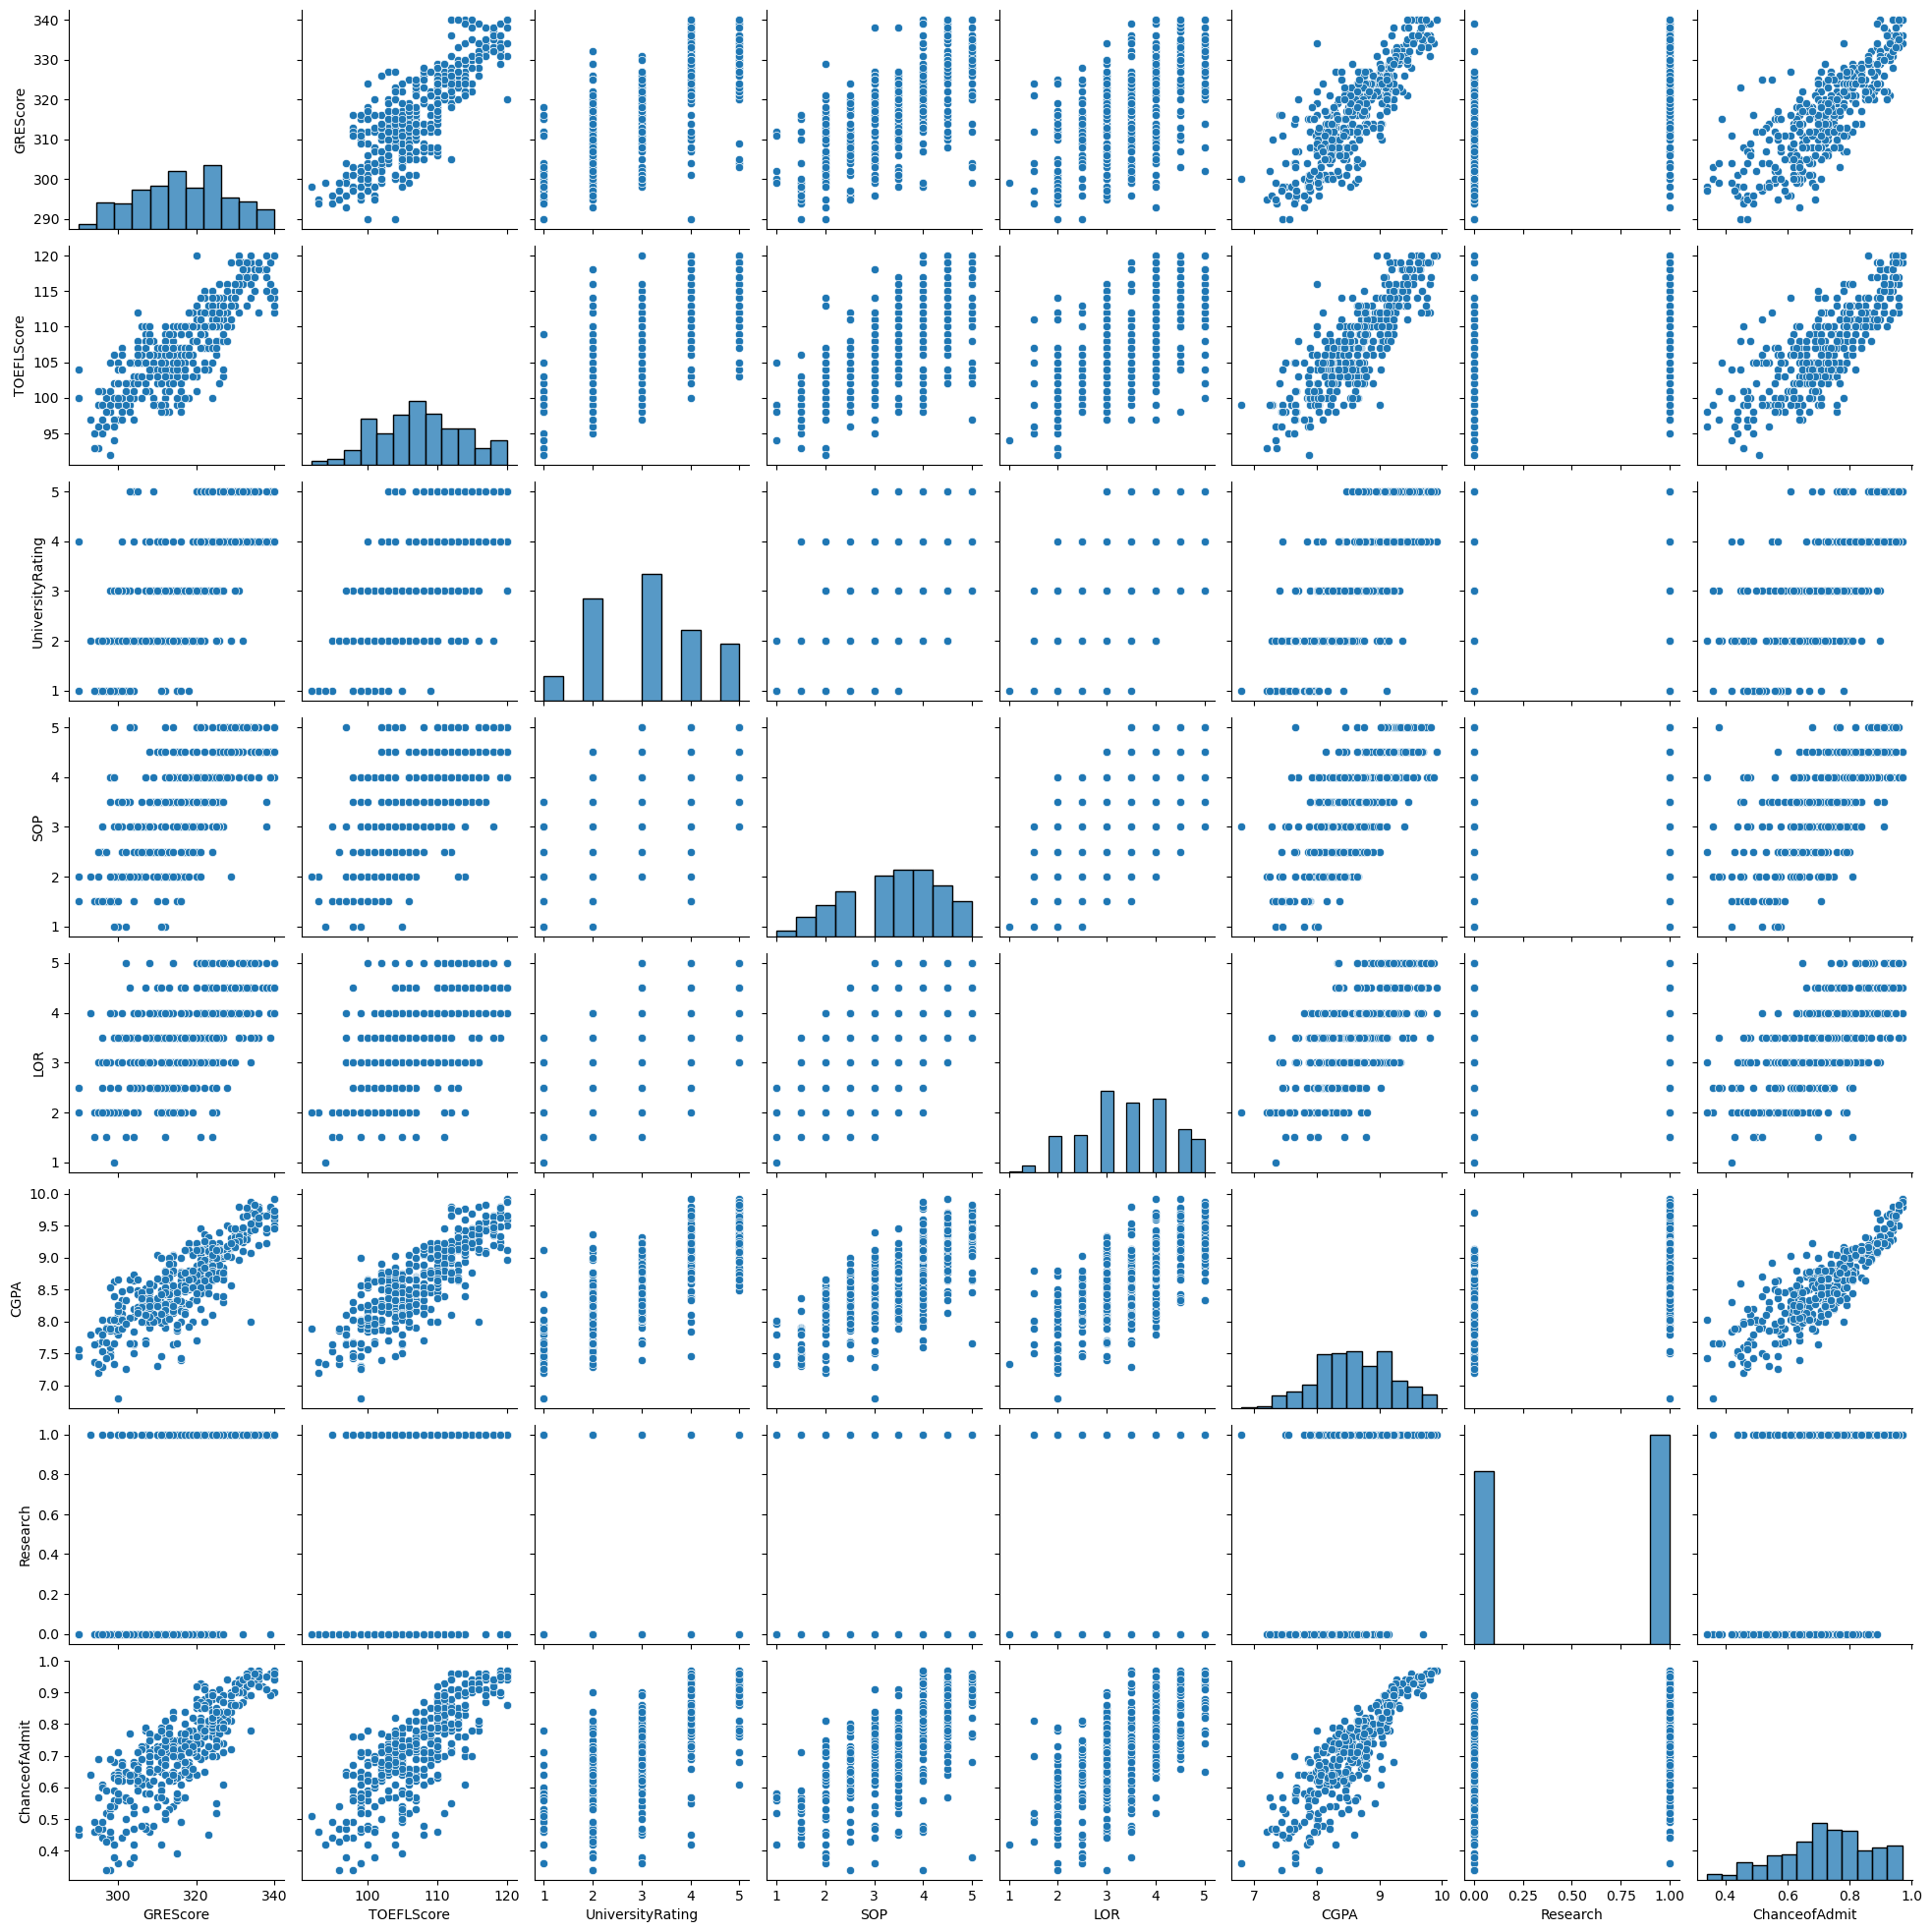

In [12]:
"""
Generating grids of scatter plots, histograms, and density plots for the dataset
to observe the relationship between the variables.
"""
sns.pairplot(graduateAdmissions)
plt.show()

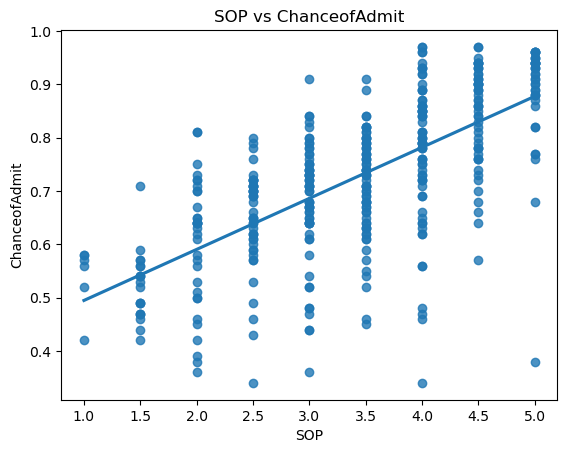

In [13]:
"""
By generating a linear regression plot we can see that SOP and ChanceofAdmit has a weak relationship.
"""
sns.regplot(x='SOP',y='ChanceofAdmit',data=graduateAdmissions,ci=None)
plt.title("SOP vs ChanceofAdmit")
plt.show()

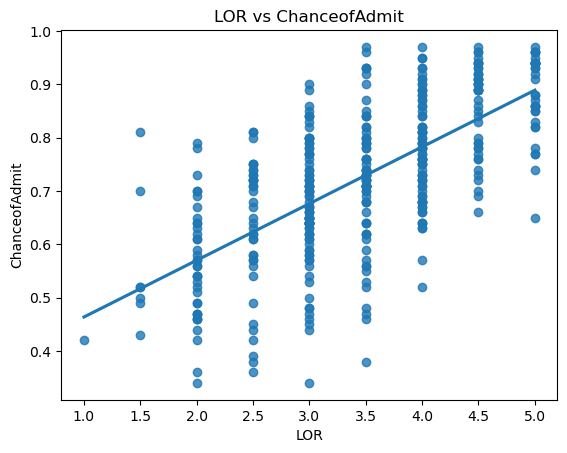

In [14]:
"""
By generating a linear regression plot we can see that LOR and ChanceofAdmit has a weak relationship.
"""
sns.regplot(x='LOR',y='ChanceofAdmit',data=graduateAdmissions,ci=None)
plt.title("LOR vs ChanceofAdmit")
plt.show()

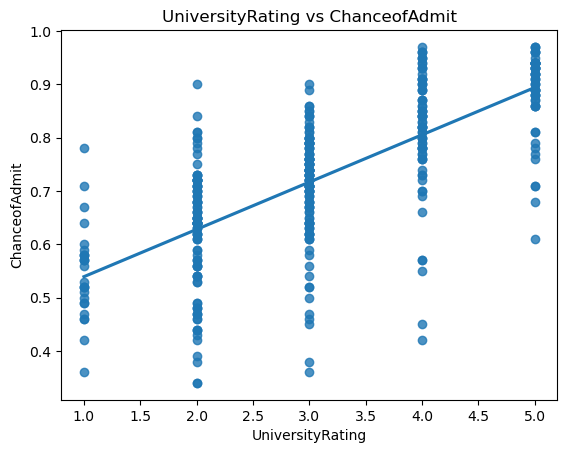

In [15]:
"""
By generating a linear regression plot we can see that UniversityRating and ChanceofAdmit has a weak relationship.
"""
sns.regplot(x='UniversityRating',y='ChanceofAdmit',data=graduateAdmissions,ci=None)
plt.title("UniversityRating vs ChanceofAdmit")
plt.show()

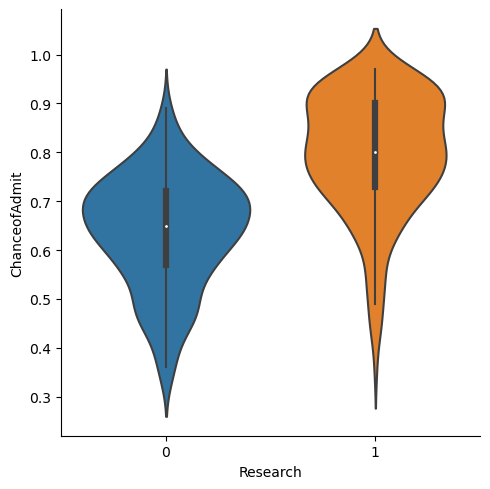

In [16]:
"""
Generating a violin plot of the relationship between ChanceofAdmit and Research points.
Looking at the visualization, we can see that doing research increases the chance of getting admitted.
"""
sns.catplot(x ='Research', y='ChanceofAdmit',data=graduateAdmissions , kind="violin" )
plt.show()

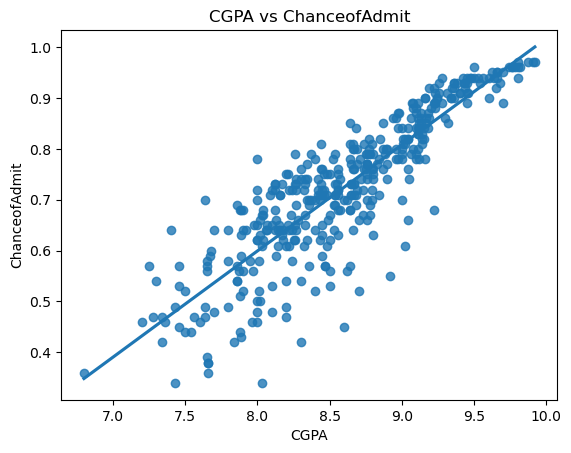

In [17]:
"""
By generating a linear regression plot we can see that CGPA and ChanceofAdmit has a strong relationship.
"""
sns.regplot(x='CGPA',y='ChanceofAdmit',data=graduateAdmissions,ci=None)
plt.title("CGPA vs ChanceofAdmit")
plt.show()

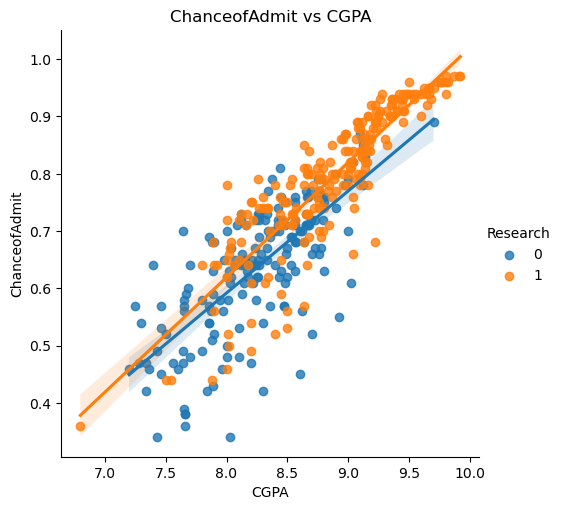

In [18]:
""" 
By including the Reasearch column in the hue parameter, we can see that the students who did research have a higher chance of getting admitted.
"""
sns.lmplot(x="CGPA", y="ChanceofAdmit", data=graduateAdmissions, hue="Research")
plt.title("ChanceofAdmit vs CGPA")
plt.show()

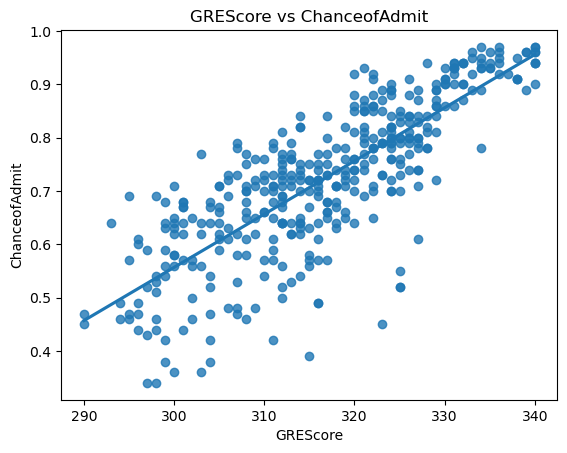

In [19]:
"""
By generating a linear regression plot we can see that GREScore and ChanceofAdmit has a strong relationship.
"""
sns.regplot(x='GREScore',y='ChanceofAdmit',data=graduateAdmissions,ci=None)
plt.title("GREScore vs ChanceofAdmit")
plt.show()

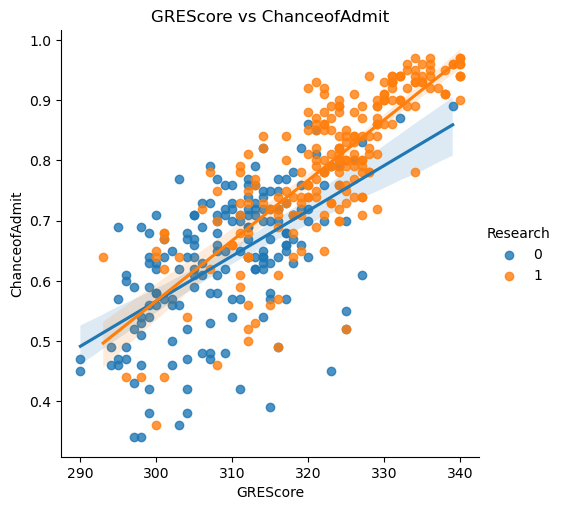

In [20]:
""" 
By including the Reasearch column in the hue parameter, we can see that the students who did research have a higher chance of getting admitted.
"""
sns.lmplot(x='GREScore',y='ChanceofAdmit',data=graduateAdmissions, hue="Research")
plt.title("GREScore vs ChanceofAdmit")
plt.show()

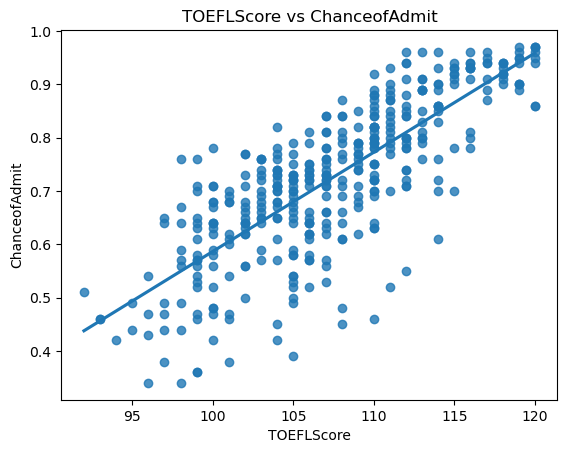

In [21]:
"""
By generating a linear regression plot we can see that TOEFLScore and ChanceofAdmit has a strong relationship.
"""
sns.regplot(x='TOEFLScore',y='ChanceofAdmit',data=graduateAdmissions,ci=None)
plt.title("TOEFLScore vs ChanceofAdmit")
plt.show()

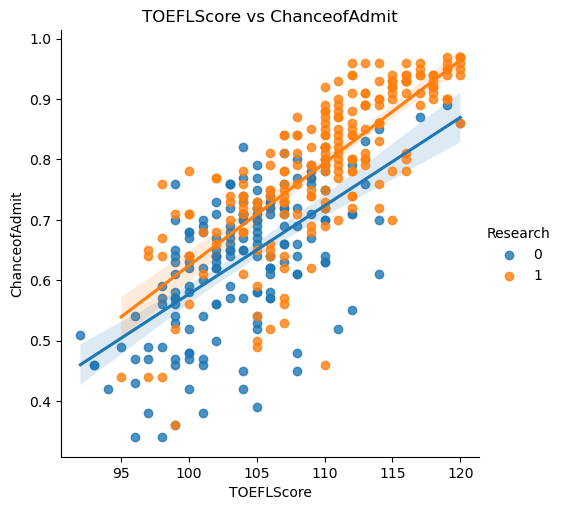

In [22]:
""" 
By including the Reasearch column in the hue parameter, we can see that the students who did research have a higher chance of getting admitted.
"""
sns.lmplot(x='TOEFLScore',y='ChanceofAdmit',data=graduateAdmissions, hue="Research")
plt.title("TOEFLScore vs ChanceofAdmit")
plt.show()

In [23]:
"""
By generating a 3D scatter plot we can see that CGPA, GREScore and TOEFLScore have a strong correlation with one another.
"""
fig = px.scatter_3d(graduateAdmissions, x="CGPA", y="GREScore", z="TOEFLScore", hover_name="ChanceofAdmit")
fig.show()

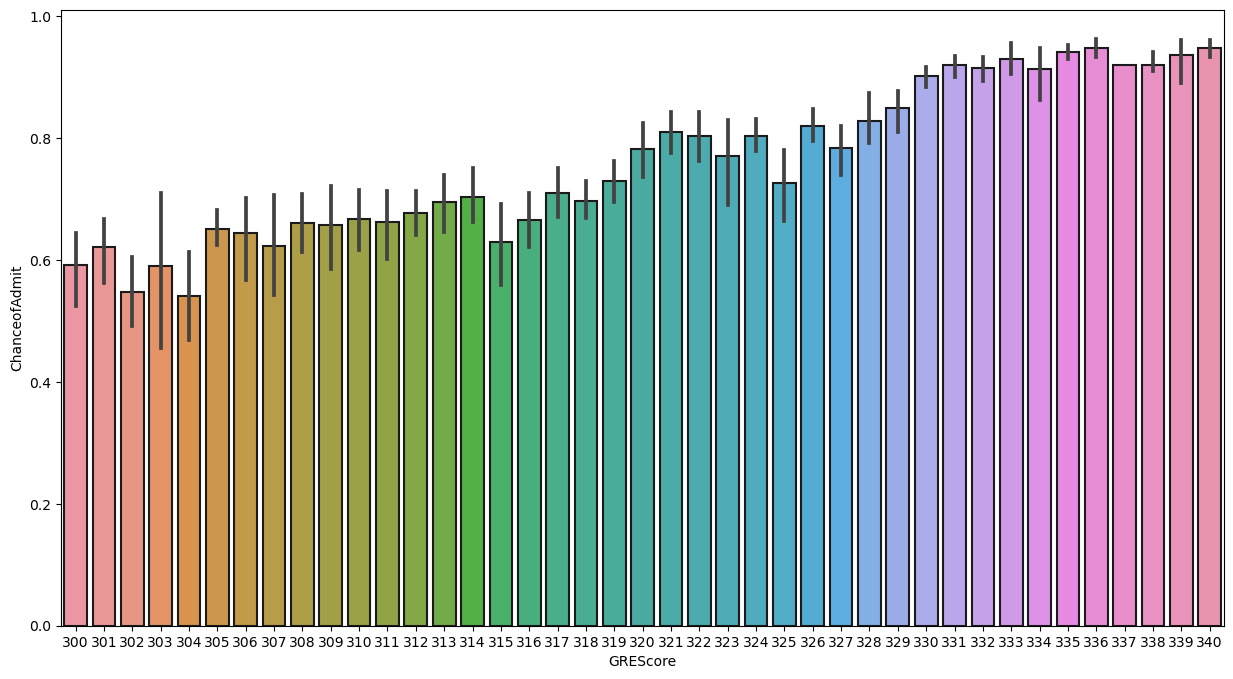

In [24]:
"""
Generating a barplot for ChanceofAdmit and GREScore, we can see with the increase in GREScore there is an increase in ChanceofAdmit.
"""
co_gre = graduateAdmissions[graduateAdmissions["GREScore"]>=300]
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='GREScore',y='ChanceofAdmit',data=co_gre, linewidth=1.5,edgecolor="0.1")
plt.show()

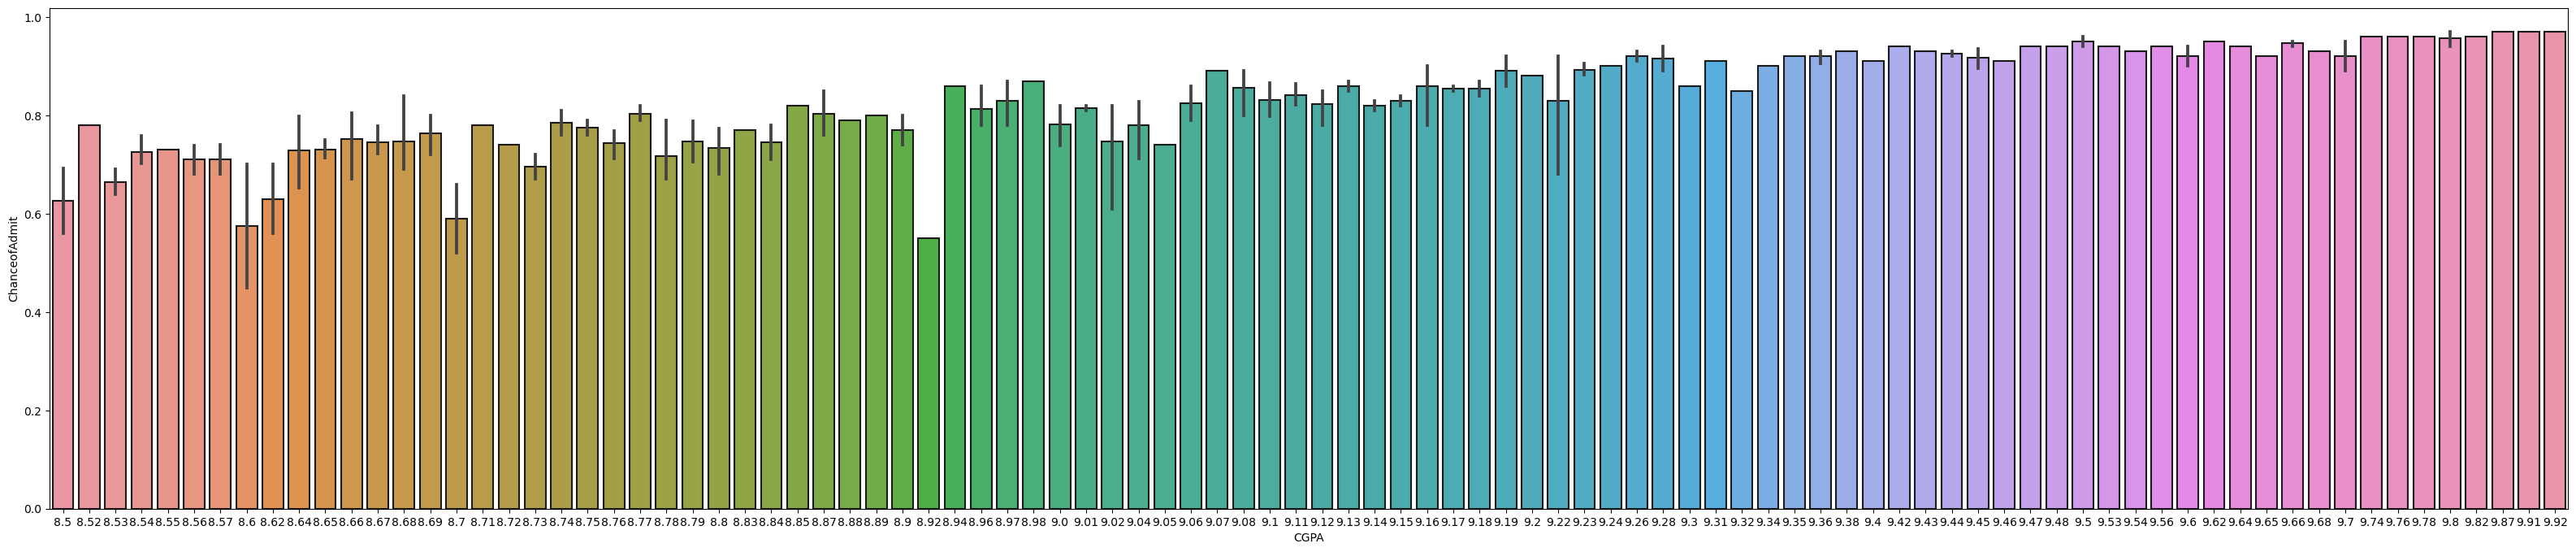

In [25]:
"""
Generating a barplot for ChanceofAdmit and CGPA, we can see with the increase in CGPA there is an increase in ChanceofAdmit.
"""
co_cgpa = graduateAdmissions[graduateAdmissions["CGPA"]>=8.5]
fig, ax = plt.subplots(figsize=(40,8))
sns.barplot(x='CGPA',y='ChanceofAdmit',data=co_cgpa, linewidth=1.5,edgecolor="0.1")
plt.show()

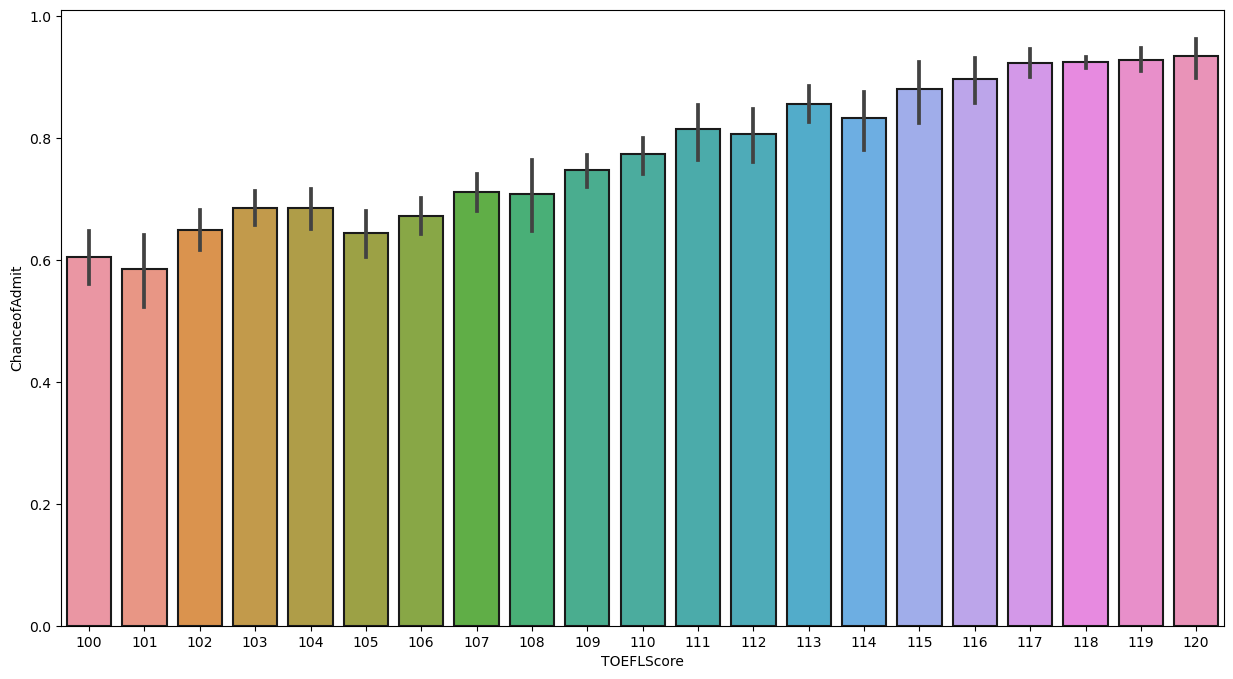

In [26]:
"""
Generating a barplot for ChanceofAdmit and TOEFLScore, we can see with the increase in TOEFLScore there is an increase in ChanceofAdmit.
"""
co_gre = graduateAdmissions[graduateAdmissions["TOEFLScore"]>=100]
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='TOEFLScore',y='ChanceofAdmit',data=co_gre, linewidth=1.5,edgecolor="0.1")
plt.show()

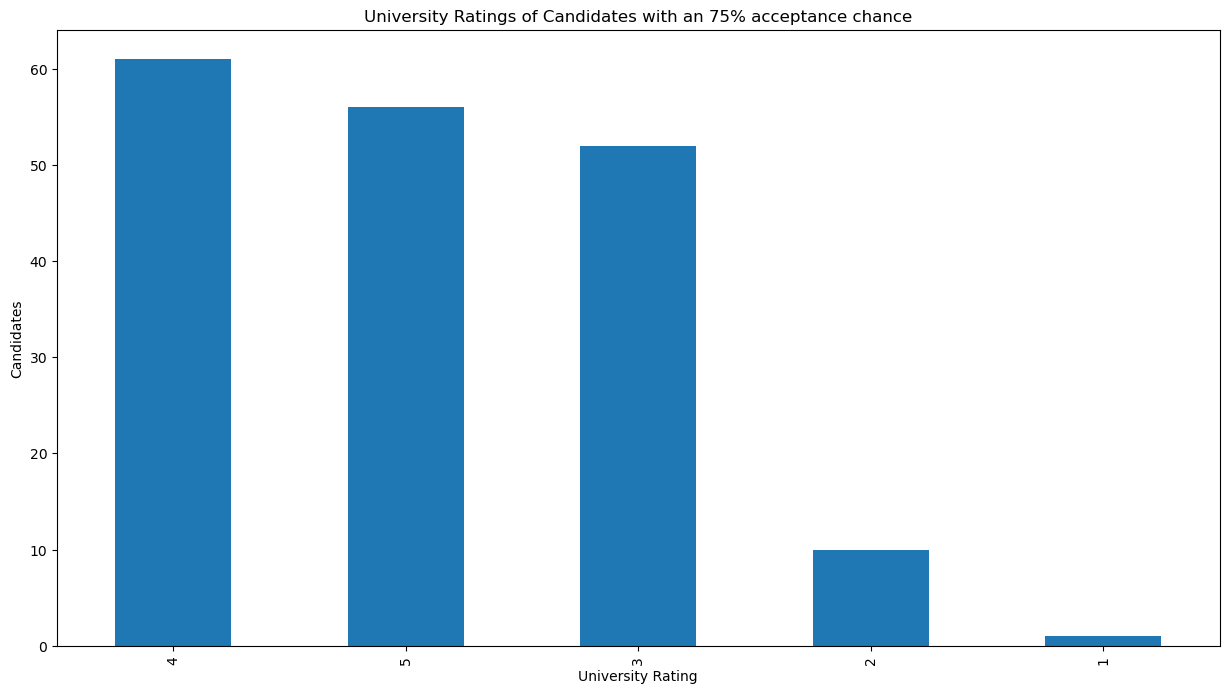

In [27]:
"""
With the plot we generated we can observe that university ratings of 3, 4 and 5 have the highest chance of getting admitted.
"""
s = graduateAdmissions[graduateAdmissions["ChanceofAdmit"] >= 0.75]["UniversityRating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
s.plot(kind='bar',figsize=(15, 8),linestyle='dashed',linewidth=5)
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.show()

**Model building**

In [28]:
"""
Splitting the dataset into training and testing sets. Dropping the ChanceofAdmit column from the dataset so that we can make predictions on it.
"""
x= graduateAdmissions.drop(['ChanceofAdmit'], axis=1).values
y = graduateAdmissions['ChanceofAdmit'].values
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=7,test_size=0.25)


In [29]:
#checking the shape before splitting to training and testing sets
x.shape

(400, 7)

In [30]:
#checking the shape after splitting to training and testing sets
x_train.shape

(300, 7)

In [31]:
"""
Used the fit() function to train our model on the training dataset.
"""
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [32]:
#making prediction on test data 
y_predict = model.predict(x_test)

# our model prediction using first 10 predictions of our model
y_predict[:10]

array([0.68432003, 0.790483  , 0.95273369, 0.70270975, 0.51748686,
       0.75961563, 0.84972718, 0.76903696, 0.71421244, 0.82635292])

In [33]:
y_test[:10]

array([0.71, 0.55, 0.94, 0.71, 0.56, 0.76, 0.89, 0.69, 0.68, 0.81])

In [34]:
#Evaluating the model performance, checking the accuracy of our model using the test set.
score=model.score(x_test, y_test)
print(score)

0.751066692125798


In [35]:
metrics.mean_absolute_error(y_test,y_predict)

0.049345742363002223

**5% Error Means our Model 95% correct.**

**Predicting my chances with my scores**

In [36]:
"""
Inserted my own marks so that the model can make a prediction on it, to determine the chances that I have of getting into graduation school.
"""
my_chance1=[315, 105, 4, 4, 4, 9.5, 1]
graduateAdmissions.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [37]:
creds=np.array(my_chance1)

In [38]:
#reshaping the array
my_chance=creds.reshape(-1, 7)

In [39]:
#Taking my_chance as input and getting predicted output ChanceofAdmit
My_prediced_chance = model.predict(my_chance)

In [40]:
#The prediction gave me a 84% chance of getting admitted.
My_prediced_chance

array([0.84768582])

**Saving model**

In [41]:
saved_model = pickle.dumps(model)